### Student Information
Name: 陳逸軒

Student ID: 111033648

GitHub ID: a42837tw

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### 1. Take Home Exercise
Copy cells from Master.ipynb

In [2]:
%load_ext autoreload
%autoreload 2

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)


import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> Exercise 1 (5 min):
In this exercise, please print out the text data for the first three samples in the dataset. (See the above code for help)

In [4]:
# Answer here
for t in  twenty_train.data[:3]:
    print("\n".join(t.split("\n")))
    print("#"*50 + "\n")

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.

##################################################

From: ani@ms.uky.edu (Aniruddha B. Deglurkar)
Subject: help: Splitting a trimming region along a mesh 
Organization: University Of Kentucky, Dept. of Math Sciences
Lines: 28



	Hi,

	I have a problem, I hope some of the 'gurus' can help me solve.

	Background 

### >>> Exercise 2 (take home):
Experiment with other querying techniques using pandas dataframes. Refer to their documentation for more information.

In [5]:
#Answer here
X.iat[2, 0]
# Access a single value for a row/column pair by integer position.

"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63  (Well, I'll email also, but this may apply to other people, so I'll post also.)  >I've been working at this company for eight years in various >engineering jobs.  I'm female.  Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company.  >I dreaded coming back to work today.  What if my boss comes in to ask >me some kind of question...  Your boss should be the person bring these problems to.  If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it.  If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving yo

### >>> Exercise 3 (5 min):
Try to fetch records belonging to the sci.med category, and query every 10th record. Only show the first 5 records.

In [6]:
# Answer here
X[X['category_name'] == 'sci.med'].iloc[::10][:5]

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> Exercise 4 (5 min):
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.
Hint: axis parameter. Check the documentation for more information.

In [7]:
# Answer here
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2252    (The amoung of missing records is: , 0)
2253    (The amoung of missing records is: , 0)
2254    (The amoung of missing records is: , 0)
2255    (The amoung of missing records is: , 0)
2256    (The amoung of missing records is: , 0)
Length: 2257, dtype: object

### >>> Exercise 5 (take home)
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.
Hint: why .isnull() didn't work?

In [8]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [9]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### 
A: np.nan: 特殊浮點數數值(dtype=float64)，在 isnull() 會判斷為 True  
B: actually donesn't exist  
C: 'NaN' represents a string  
D: same as C  
E: None ，在 isnull() 會為 True  
F: '' represents a empty string  

### >>> Exercise 6 (take home):
Notice any changes to the X dataframe? What are they? Report every change you noticed as compared to the previous state of X. Feel free to query and look more closely at the dataframe for these changes.

In [10]:
X_sample = X.sample(n=1000) #random state

# Answer here
X.category_name.value_counts()
#X.groupby("category").count()
#size()

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64

In [11]:
X_sample.category_name.value_counts()

comp.graphics             274
sci.med                   260
soc.religion.christian    252
alt.atheism               214
Name: category_name, dtype: int64

The amount of data in X dataframe doesn't change.  
But the distrubution of X and X_sample are different.

### >>> Exercise 8 (take home):
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

<AxesSubplot: title={'center': 'Category distribution'}>

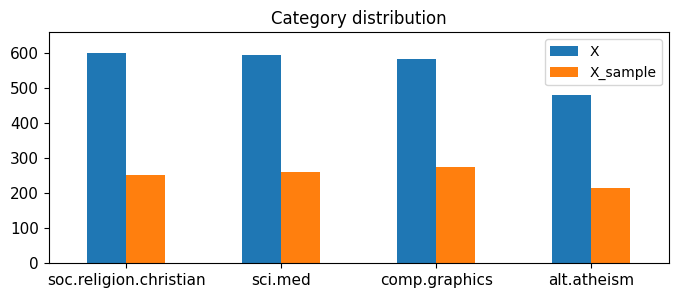

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

y_lim = max(X.category_name.value_counts()) * 1.1
X_all = pd.concat([X.category_name.value_counts(), X_sample.category_name.value_counts()], axis=1)
X_all.columns = ['X', 'X_sample']
X_all.plot(kind="bar", title='Category distribution', ylim=[0, y_lim], rot=0, fontsize=11, figsize = (8,3))
# plt.show


In [22]:
import nltk
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
X['unigrams']

0       [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1       [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2       [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3       [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
4       [From, :, stanly, @, grok11.columbiasc.ncr.com...
                              ...                        
2252    [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...
2253    [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...
2254    [From, :, sasghm, @, theseus.unx.sas.com, (, G...
2255    [From, :, Dan, Wallach, <, dwallach, @, cs.ber...
2256    [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...
Name: unigrams, Length: 2257, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)


365886


In [27]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']